In [1]:
import pandas as pd 
datas = pd.read_csv('activities_2021-22.csv',encoding='unicode_escape')
datas.head()

,Symbol,Company,Ongoing/ One-time,Activity,Sector,Schedule,Amount to be Spent as decided by Company (Rs.lacs),Actual Amount Spent (Rs.lacs),Amount transferred to Unspent CSR Account for the project (Rs.lacs),Direct-Agency Name/s,Direct-Amount (Rs.lacs),Implementing Agency Name/s,Implementing Agency-Amount (Rs.lacs),States (City/Town/District/Village)
0,20MICRONS,20 MICRONS LTD.,One-time,COMMUNITY HEALTHCARE,PROMOTING HEALTH CARE INCLUDING PREVENTIVE HEA...,SCHEDULE VII (I),NaN,45.37,NaN,20 MICRONS FOUNDATION TRUST,45.37,NaN,NaN,GUJARAT (VADODARA)
1,20MICRONS,20 MICRONS LTD.,One-time,EDUCATION TO CULTURAL SOCIETY FOR TRIBAL DEVEL...,PROMOTING EDUCATION,SCHEDULE VII (II),NaN,0.51,NaN,"SHRIHARI SATSANG SAMITI, MUMBAI (CULTURAL SOCI...",0.51,NaN,NaN,MAHARASHTRA (MUMBAI)
2,20MICRONS,20 MICRONS LTD.,One-time,HELPING BLIND AND HANDICAPPED PEOPLE,HEALTH CARE INCLUDING PREVENTIVE HEALTH CARE,SCHEDULE VII (I),NaN,12.00,NaN,OMKAR ANDH-APANG SAMAJIK SANSTHA,12.00,NaN,NaN,MAHARASHTRA (MUMBAI)
3,360ONE,360 ONE WAM LTD.,One-time,FOSTERING INNOVATION THROUGH TRAINING AND CATA...,(IX) A,SCHEDULE VII (IX),NaN,31.65,NaN,IIFLW CSR FOUNDATION,31.65,NaN,NaN,GUJARAT (AHMEDABAD)
4,360ONE,360 ONE WAM LTD.,One-time,LIVELIHOODS ENHANCEMENT PROJECT FOR INDIVIDUAL...,(II),SCHEDULE VII (II),NaN,180.38,NaN,IIFLW CSR FOUNDATION,180.38,NaN,NaN,"BIHAR (EAST CHAMPARAN,MUZAFFARPUR),HARYANA (GU..."


In [2]:
df = datas[['Company','Activity']]
df.head()

,Company,Activity
0,20 MICRONS LTD.,COMMUNITY HEALTHCARE
1,20 MICRONS LTD.,EDUCATION TO CULTURAL SOCIETY FOR TRIBAL DEVEL...
2,20 MICRONS LTD.,HELPING BLIND AND HANDICAPPED PEOPLE
3,360 ONE WAM LTD.,FOSTERING INNOVATION THROUGH TRAINING AND CATA...
4,360 ONE WAM LTD.,LIVELIHOODS ENHANCEMENT PROJECT FOR INDIVIDUAL...


In [3]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
data = df.Activity.values.tolist()
print(type(data[1]))
#data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]
#data = [re.sub(r'\s+', ' ', sent) for sent in data]
#data = [re.sub(r"\'", "", sent) for sent in data]
pprint(data[:1])

<class 'str'>
['COMMUNITY HEALTHCARE']


In [5]:
def stow(sent):
    for sent in sent:
        yield(gensim.utils.simple_preprocess(str(sent), deacc=True))
data_words = list(stow(data))
print(data_words[:1])

[['community', 'healthcare']]


In [6]:
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])
nlp.max_length = 2000000
def lemmatization(texts):
    a=['NOUN', 'VERB']
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in a]))
    return texts_out
data_lemmatiz = lemmatization(data_words)
data_lemmatized = []
for i in data_lemmatiz : 
    j = i.split()
    data_lemmatized.append(j)
print(data_lemmatiz)

['community healthcare', 'education society development', 'help people', 'foster innovation training support inclusion startup cater income segment initiative', 'livelihood enhancement project individual business foundation', 'award program', 'community vaccination program', '', 'smile wheel clinic intervention district', 'project education', 'augmentation program', 'school readiness project bear learn center location', 'community vaccination program', 'equipment', 'power program', 'skill development', 'course assessment skill development relate', 'promote education include education employment enhance vocation skill child woman able livelihood enhancement project', 'relief poverty relief education', 'age welfare', 'support build house group', 'education', 'healthcare education disaster relief', 'covid support', 'support build house group', 'education', 'environment conservation', 'woman', 'development', 'covid relief support', 'environment conservation', 'education skill development',

In [7]:
data_vectorized = CountVectorizer(analyzer='word', min_df=10, stop_words='english', lowercase=True,token_pattern='[a-zA-Z0-9]{3,}').fit_transform(data_lemmatiz)

In [8]:
lda_model = LatentDirichletAllocation(n_components=10,max_iter=10,learning_method='online',random_state=100,batch_size=128,
                                      evaluate_every = -1,n_jobs = -1)
lda_output = lda_model.fit_transform(data_vectorized)

In [9]:
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
pprint(lda_model.get_params())

Log Likelihood:  -355260.31005006743
Perplexity:  335.66751007931464
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [10]:
search_params = {'n_components': [5, 10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
lda = LatentDirichletAllocation()
model = GridSearchCV(lda, param_grid=search_params,n_jobs = -1)
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(), n_jobs=-1,
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 10, 15, 20, 25, 30]})

In [11]:
best_lda_model = model.best_estimator_

print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score is a measure of goodness of fit
#for any model. Higher the value, better is the model
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 5}
Best Log Likelihood Score:  -74078.05192473184
Model Perplexity:  267.2786592275447


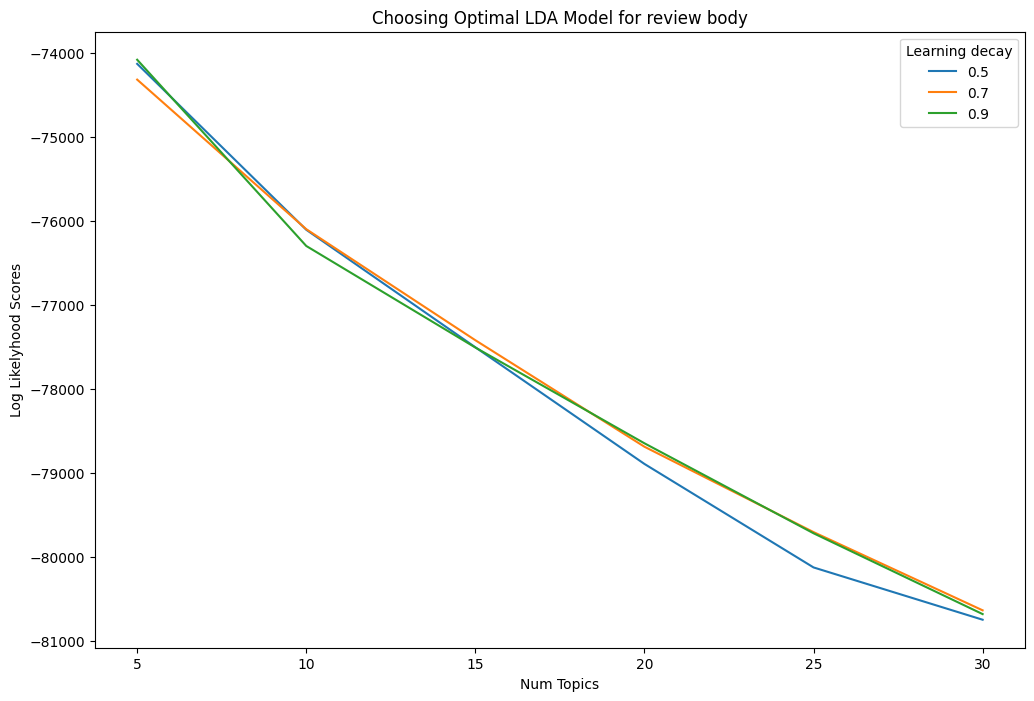

In [12]:
n_topics = [5, 10, 15, 20, 25, 30]
log_likelyhoods_5 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.5]
log_likelyhoods_7 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.7]
log_likelyhoods_9 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model for review body")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [13]:
lda_output = best_lda_model.transform(data_vectorized)


topicnames = ["Topic" + str(i) for i in range(5)]
docnames = ["Doc" + str(i) for i in range(len(data))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.07,0.73,0.07,0.07,0.07,1
Doc1,0.05,0.36,0.48,0.05,0.05,2
Doc2,0.73,0.07,0.07,0.07,0.07,0
Doc3,0.19,0.21,0.03,0.54,0.03,3
Doc4,0.32,0.60,0.03,0.03,0.03,1
...,...,...,...,...,...,...
Doc16094,0.05,0.36,0.49,0.05,0.05,2
Doc16095,0.46,0.20,0.03,0.03,0.27,0
Doc16096,0.40,0.03,0.03,0.03,0.50,4
Doc16097,0.04,0.23,0.04,0.04,0.64,4


In [14]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,4893
1,1,3376
2,2,3058
3,3,2538
4,4,2234


In [15]:
from gensim.corpora import Dictionary
dictionary = Dictionary(data_lemmatized)
corpus = [dictionary.doc2bow(text) for text in data_lemmatized]
from gensim.models import  LdaModel
ldamodel = LdaModel(corpus=corpus, num_topics=5, id2word=dictionary)
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [16]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.054304  0.159071       1        1  24.708304
1      0.236360 -0.162064       2        1  21.500850
3     -0.063955  0.151294       3        1  20.615927
4     -0.278080 -0.142545       4        1  16.948628
2      0.051371 -0.005756       5        1  16.226290, topic_info=               Term         Freq        Total Category  logprob  loglift
68           health  1566.000000  1566.000000  Default  30.0000  30.0000
67             care  1067.000000  1067.000000  Default  29.0000  29.0000
0         community  1199.000000  1199.000000  Default  28.0000  28.0000
74   infrastructure   758.000000   758.000000  Default  27.0000  27.0000
96           supply   766.000000   766.000000  Default  26.0000  26.0000
..              ...          ...          ...      ...      ...      ...
16         training   102.218329   572.504919   Topic5  -4.7041   0.0956
127     scholarship    77.222694   223.167771   Topic5  -4.9845   0.7573
60            covid    81.258777  1458.906208   Topic5  -4.9336  -1.0693
27         district    71.556810   252.366570   Topic5  -5.0607   0.5581
37           school    75.087884  1158.732586   Topic5  -5.0125  -0.9179

[319 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1141      2  0.974664    action
124       1  0.473039  activity
124       2  0.048208  activity
124       3  0.012052  activity
124       4  0.036156  activity
...     ...       ...       ...
173       1  0.085355     youth
173       2  0.884592     youth
173       3  0.007760     youth
173       4  0.007760     youth
173       5  0.023279     youth

[659 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 5, 3])

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm_t = cv.fit_transform(df['Activity'].values.astype('U'))
from sklearn.decomposition import LatentDirichletAllocation
LDA_b = LatentDirichletAllocation(n_components=5,random_state=42,learning_decay=0.9)
LDA_b.fit(dtm_t)

LatentDirichletAllocation(learning_decay=0.9, n_components=5, random_state=42)

In [18]:
for index,topic in enumerate(LDA_b.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['skills', 'promotion', 'vocational', 'contribution', 'foundation', 'underprivileged', 'students', 'project', 'livelihood', 'providing', 'training', 'support', 'promoting', 'children', 'education']


THE TOP 15 WORDS FOR TOPIC #1
['food', 'preventive', 'hospital', 'providing', 'promoting', 'distribution', 'healthcare', 'oxygen', 'medical', 'relief', 'support', '19', 'care', 'health', 'covid']


THE TOP 15 WORDS FOR TOPIC #2
['projects', 'animal', 'activities', 'social', 'contribution', 'gram', 'welfare', 'village', 'water', 'management', 'community', 'skill', 'rural', 'project', 'development']


THE TOP 15 WORDS FOR TOPIC #3
['safe', 'empowerment', 'students', 'construction', 'training', 'holistic', 'maintenance', 'support', 'women', 'sports', 'drinking', 'development', 'rural', 'water', 'program']


THE TOP 15 WORDS FOR TOPIC #4
['cancer', 'primary', 'renovation', 'trust', 'infrastructure', 'installation', 'government', 'district', 'providing', 'schools',

In [19]:
lda_output = LDA_b.transform(dtm_t)


topicnames = ["Topic" + str(i) for i in range(5)]
docnames = ["Doc" + str(i) for i in range(len(data))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames)

dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic['CATEGORY'] = df_document_topic['dominant_topic'].apply(lambda x: 'Education' if x == 0 else ('Medical and Health' if x == 1 else ('Social Welfare' if x== 2 else ('Development Related' if x==3 else 'Government Related' ))))

df_document_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic,CATEGORY
0,0.07,0.73,0.07,0.07,0.07,1,Medical and Health
1,0.36,0.03,0.54,0.03,0.03,2,Social Welfare
2,0.84,0.04,0.04,0.04,0.04,0,Education
3,0.26,0.15,0.02,0.02,0.55,4,Government Related
4,0.70,0.02,0.02,0.02,0.24,0,Education
...,...,...,...,...,...,...,...
16094,0.44,0.03,0.03,0.20,0.30,0,Education
16095,0.03,0.90,0.03,0.03,0.03,1,Medical and Health
16096,0.02,0.02,0.02,0.58,0.35,3,Development Related
16097,0.04,0.04,0.04,0.04,0.84,4,Government Related


In [20]:
df['Category'] = df_document_topic['CATEGORY']
df

C:\Users\hp\AppData\Local\Temp\ipykernel_6264\3910368807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = df_document_topic['CATEGORY']


,Company,Activity,Category
0,20 MICRONS LTD.,COMMUNITY HEALTHCARE,Medical and Health
1,20 MICRONS LTD.,EDUCATION TO CULTURAL SOCIETY FOR TRIBAL DEVEL...,Social Welfare
2,20 MICRONS LTD.,HELPING BLIND AND HANDICAPPED PEOPLE,Education
3,360 ONE WAM LTD.,FOSTERING INNOVATION THROUGH TRAINING AND CATA...,Government Related
4,360 ONE WAM LTD.,LIVELIHOODS ENHANCEMENT PROJECT FOR INDIVIDUAL...,Education
...,...,...,...
16094,ZUARI AGRO CHEMICALS LTD.,SCHOLARSHIPS FOR PROMOTING SECONDARY AND HIGHE...,Education
16095,ZUARI INDUSTRIES LTD.,INSTALLATION OF PSA OXYGEN PLANT AT PUBLIC HEA...,Medical and Health
16096,ZUARI INDUSTRIES LTD.,DRINKING WATER SUPPLY AT 5 LOCATIONS (RO SYSTE...,Development Related
16097,ZUARI INDUSTRIES LTD.,SCHOOL BUILDING RENOVATION PROJECT,Government Related


In [21]:
datas['Category'] = df_document_topic['CATEGORY']
datas

,Symbol,Company,Ongoing/ One-time,Activity,Sector,Schedule,Amount to be Spent as decided by Company (Rs.lacs),Actual Amount Spent (Rs.lacs),Amount transferred to Unspent CSR Account for the project (Rs.lacs),Direct-Agency Name/s,Direct-Amount (Rs.lacs),Implementing Agency Name/s,Implementing Agency-Amount (Rs.lacs),States (City/Town/District/Village),Category
0,20MICRONS,20 MICRONS LTD.,One-time,COMMUNITY HEALTHCARE,PROMOTING HEALTH CARE INCLUDING PREVENTIVE HEA...,SCHEDULE VII (I),NaN,45.37,NaN,20 MICRONS FOUNDATION TRUST,45.37,NaN,NaN,GUJARAT (VADODARA),Medical and Health
1,20MICRONS,20 MICRONS LTD.,One-time,EDUCATION TO CULTURAL SOCIETY FOR TRIBAL DEVEL...,PROMOTING EDUCATION,SCHEDULE VII (II),NaN,0.51,NaN,"SHRIHARI SATSANG SAMITI, MUMBAI (CULTURAL SOCI...",0.51,NaN,NaN,MAHARASHTRA (MUMBAI),Social Welfare
2,20MICRONS,20 MICRONS LTD.,One-time,HELPING BLIND AND HANDICAPPED PEOPLE,HEALTH CARE INCLUDING PREVENTIVE HEALTH CARE,SCHEDULE VII (I),NaN,12.00,NaN,OMKAR ANDH-APANG SAMAJIK SANSTHA,12.00,NaN,NaN,MAHARASHTRA (MUMBAI),Education
3,360ONE,360 ONE WAM LTD.,One-time,FOSTERING INNOVATION THROUGH TRAINING AND CATA...,(IX) A,SCHEDULE VII (IX),NaN,31.65,NaN,IIFLW CSR FOUNDATION,31.65,NaN,NaN,GUJARAT (AHMEDABAD),Government Related
4,360ONE,360 ONE WAM LTD.,One-time,LIVELIHOODS ENHANCEMENT PROJECT FOR INDIVIDUAL...,(II),SCHEDULE VII (II),NaN,180.38,NaN,IIFLW CSR FOUNDATION,180.38,NaN,NaN,"BIHAR (EAST CHAMPARAN,MUZAFFARPUR),HARYANA (GU...",Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16094,ZUARI,ZUARI AGRO CHEMICALS LTD.,One-time,SCHOLARSHIPS FOR PROMOTING SECONDARY AND HIGHE...,(I),SCHEDULE VII (II),NaN,0.38,NaN,NaN,0.38,NaN,NaN,GOA (SOUTH GOA),Education
16095,ZUARIIND,ZUARI INDUSTRIES LTD.,One-time,INSTALLATION OF PSA OXYGEN PLANT AT PUBLIC HEA...,(I) PROMOTING HEALTH CARE INCLUDING PREVENTIVE...,SCHEDULE VII (I),NaN,33.88,NaN,NaN,33.88,NaN,NaN,UTTAR PRADESH (LAKHIMPUR KHERI),Medical and Health
16096,ZUARIIND,ZUARI INDUSTRIES LTD.,One-time,DRINKING WATER SUPPLY AT 5 LOCATIONS (RO SYSTE...,(I) AVAILABILITY OF SAFE DRINKING WATER,SCHEDULE VII (I),NaN,8.51,NaN,NaN,8.51,NaN,NaN,UTTAR PRADESH (LAKHIMPUR KHERI),Development Related
16097,ZUARIIND,ZUARI INDUSTRIES LTD.,One-time,SCHOOL BUILDING RENOVATION PROJECT,(II) PROMOTION OF EDUCATION;,SCHEDULE VII (II),NaN,3.04,NaN,NaN,3.04,NaN,NaN,UTTAR PRADESH (LAKHIMPUR KHERI),Government Related


In [22]:
d1 = datas.loc[(datas.Category == 'Medical and Health')]

In [23]:
d1

,Symbol,Company,Ongoing/ One-time,Activity,Sector,Schedule,Amount to be Spent as decided by Company (Rs.lacs),Actual Amount Spent (Rs.lacs),Amount transferred to Unspent CSR Account for the project (Rs.lacs),Direct-Agency Name/s,Direct-Amount (Rs.lacs),Implementing Agency Name/s,Implementing Agency-Amount (Rs.lacs),States (City/Town/District/Village),Category
0,20MICRONS,20 MICRONS LTD.,One-time,COMMUNITY HEALTHCARE,PROMOTING HEALTH CARE INCLUDING PREVENTIVE HEA...,SCHEDULE VII (I),NaN,45.37,NaN,20 MICRONS FOUNDATION TRUST,45.37,NaN,NaN,GUJARAT (VADODARA),Medical and Health
8,3MINDIA,3M INDIA LTD.,Ongoing,SMILE ON WHEELS MOBILE HEALTH CLINIC INTERVENT...,"(I) ERADICATING HUNGER, POVERTY AND MALNUTRITI...",SCHEDULE VII (I),485.27,55.00,NaN,NaN,NaN,SMILE FOUNDATION,55.00,"ASSAM (GOALPARA),MAHARASHTRA (PUNE),ODISHA (BA...",Medical and Health
10,3MINDIA,3M INDIA LTD.,One-time,ICU AUGMENTATION PROGRAMS,"(XII) DISASTER MANAGEMENT, INCLUDING RELIEF, R...",SCHEDULE VII (XII),55.86,55.86,NaN,NaN,NaN,"UNITED WAY OF BENGALURU, GOVT.OF TAMIL NADU",55.86,KARNATAKA (BENGALURU),Medical and Health
12,3MINDIA,3M INDIA LTD.,One-time,COMMUNITY VACCINATION PROGRAMS,"(I) ERADICATING HUNGER, POVERTY AND MALNUTRITI...",SCHEDULE VII (I),269.44,269.44,NaN,NaN,NaN,"UNITED WAY OF BENGALURU, GOVT.OF TAMIL NADU",269.44,"KARNATAKA (BENGALURU),MAHARASHTRA (AHMEDNAGAR,...",Medical and Health
18,AARTIDRUGS,AARTI DRUGS LTD.,One-time,"MEDICAL RELIEF, POVERTY RELIEF, EDUCATION","(I), (II)","SCHEDULE VII (I), SCHEDULE VII (II)",NaN,51.00,NaN,NaN,NaN,POPATLAL BHACHUBHAI NANDU CHARITABLE TRUST,51.00,"GUJARAT,MAHARASHTRA",Medical and Health
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16086,ZFCVINDIA,ZF COMMERCIAL VEHICLE CONTROL SYSTEMS INDIA LTD.,One-time,HEALTH CARE SUPPORT TO COMMUNITY HOSPITALS INC...,ITEM (I) - PROMOTING HEALTH CARE INCLUDING PRE...,SCHEDULE VII (I),NaN,51.97,NaN,WABCO FOUNDATION,51.97,NaN,NaN,TAMIL NADU (CHENNAI),Medical and Health
16087,ZFCVINDIA,ZF COMMERCIAL VEHICLE CONTROL SYSTEMS INDIA LTD.,One-time,HEALTH CARE SUPPORT TO COMMUNITY HOSPITALS INC...,ITEM (I) - PROMOTING HEALTH CARE INCLUDING PRE...,SCHEDULE VII (I),NaN,50.00,NaN,WABCO FOUNDATION,50.00,NaN,NaN,TAMIL NADU (CHENNAI),Medical and Health
16088,ZODIACLOTH,ZODIAC CLOTHING CO.LTD.,One-time,DONATED AN AIRSEP OXYGEN PLANT TO EXCELLENCE H...,ITEM NO (I): PROMOTING HEALTH CARE INCLUDING P...,SCHEDULE VII (I),NaN,53.11,NaN,NaN,53.11,NaN,NaN,RAJASTHAN (SIKAR),Medical and Health
16091,ZUARI,ZUARI AGRO CHEMICALS LTD.,One-time,EMERGENCY SUPPORT TO COMMUNITY DURING COVID-19,(XII),SCHEDULE VII (XII),NaN,5.77,NaN,NaN,5.77,NaN,NaN,GOA (SOUTH GOA),Medical and Health


In [24]:
d1.to_csv('csr_2021-22_filteredbook1.csv')

In [25]:
df2 = d1[['Company','Activity']]
df2

,Company,Activity
0,20 MICRONS LTD.,COMMUNITY HEALTHCARE
8,3M INDIA LTD.,SMILE ON WHEELS MOBILE HEALTH CLINIC INTERVENT...
10,3M INDIA LTD.,ICU AUGMENTATION PROGRAMS
12,3M INDIA LTD.,COMMUNITY VACCINATION PROGRAMS
18,AARTI DRUGS LTD.,"MEDICAL RELIEF, POVERTY RELIEF, EDUCATION"
...,...,...
16086,ZF COMMERCIAL VEHICLE CONTROL SYSTEMS INDIA LTD.,HEALTH CARE SUPPORT TO COMMUNITY HOSPITALS INC...
16087,ZF COMMERCIAL VEHICLE CONTROL SYSTEMS INDIA LTD.,HEALTH CARE SUPPORT TO COMMUNITY HOSPITALS INC...
16088,ZODIAC CLOTHING CO.LTD.,DONATED AN AIRSEP OXYGEN PLANT TO EXCELLENCE H...
16091,ZUARI AGRO CHEMICALS LTD.,EMERGENCY SUPPORT TO COMMUNITY DURING COVID-19


In [26]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
data = df2.Activity.values.tolist()
print(type(data[1]))
#data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]
#data = [re.sub(r'\s+', ' ', sent) for sent in data]
#data = [re.sub(r"\'", "", sent) for sent in data]
pprint(data[:4])

<class 'str'>
['COMMUNITY HEALTHCARE',
 'SMILE ON WHEELS MOBILE HEALTH CLINIC INTERVENTION IN ASPIRATIONAL DISTRICTS',
 'ICU AUGMENTATION PROGRAMS',
 'COMMUNITY VACCINATION PROGRAMS']


In [28]:
def stow(sent):
    for sent in sent:
        yield(gensim.utils.simple_preprocess(str(sent), deacc=True))
data_words = list(stow(data))
print(data_words[:1])

[['community', 'healthcare']]


In [29]:
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])
nlp.max_length = 2000000
def lemmatization(texts):
    a=['NOUN', 'VERB']
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in a]))
    return texts_out
data_lemmatiz = lemmatization(data_words)
data_lemmatized = []
for i in data_lemmatiz : 
    j = i.split()
    data_lemmatized.append(j)
print(data_lemmatiz)

['community healthcare', 'smile wheel clinic intervention district', 'augmentation program', 'community vaccination program', 'relief poverty relief education', 'age welfare', 'healthcare education disaster relief', 'covid support', 'covid relief support', 'disaster relief', 'healthcare', 'healthcare', 'healthcare facility office collector district dhar', 'health care facility', 'healthcare facility superintendent district dhar', 'hunger eradication camp', 'opd', '', '', '', 'cyber security awareness', '', '', '', '', '', '', 'plantation', 'provide support require health care assistance woman facility recipient nashik', 'contribution supply essential covid gotri government hospital maneja', 'contribution supply essential covid employee state insurance', 'operation health care unit community', 'contribution supply essential covid', 'operation health care unit community', 'contribution supply essential covid shri', 'procurement installation need equipment facility hospital cancer care pa

In [30]:
data_vectorized = CountVectorizer(analyzer='word', min_df=10, stop_words='english', lowercase=True,token_pattern='[a-zA-Z0-9]{3,}').fit_transform(data_lemmatiz)

In [31]:
search_params = {'n_components': [2,3,4,5,6,7,8,9,10,11,12], 'learning_decay': [.5, .7, .9]}
lda = LatentDirichletAllocation()
model = GridSearchCV(lda, param_grid=search_params,n_jobs = -1)
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(), n_jobs=-1,
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [32]:
best_lda_model = model.best_estimator_

print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score is a measure of goodness of fit
#for any model. Higher the value, better is the model
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 2}
Best Log Likelihood Score:  -17016.27458976666
Model Perplexity:  98.97602704350116


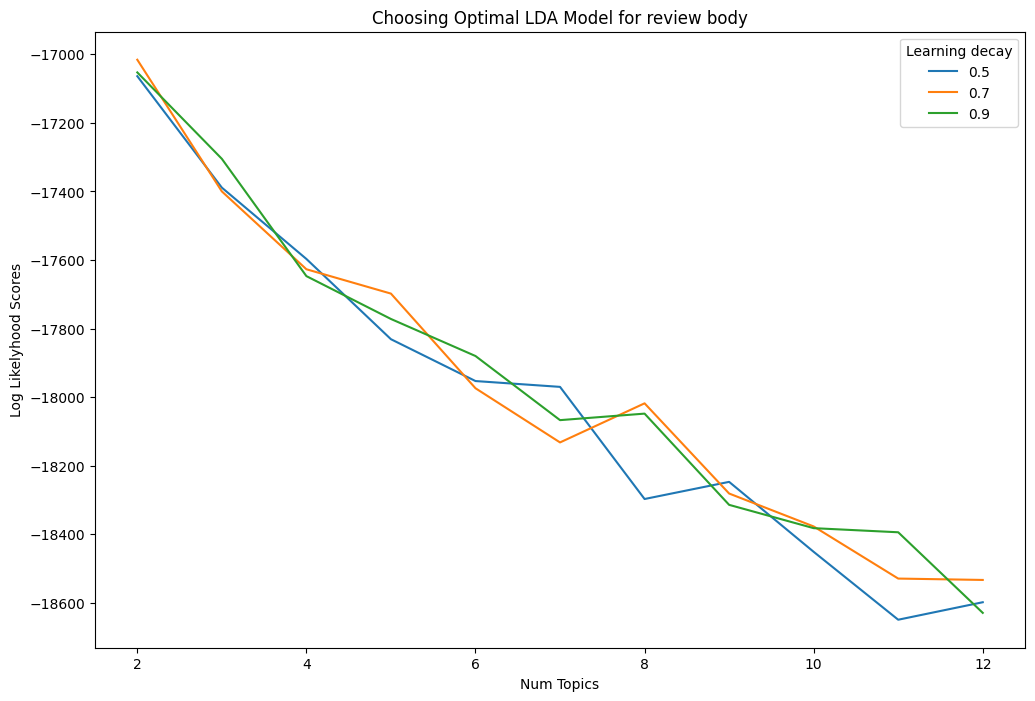

In [33]:
n_topics = [2,3,4,5,6,7,8,9,10,11,12]
log_likelyhoods_5 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.5]
log_likelyhoods_7 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.7]
log_likelyhoods_9 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model for review body")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [34]:
lda_output = best_lda_model.transform(data_vectorized)


topicnames = ["Topic" + str(i) for i in range(2)]
docnames = ["Doc" + str(i) for i in range(len(data))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic

,Topic0,Topic1,dominant_topic
Doc0,0.83,0.17,0
Doc1,0.57,0.43,0
Doc2,0.25,0.75,1
Doc3,0.38,0.62,1
Doc4,0.30,0.70,1
...,...,...,...
Doc4346,0.90,0.10,0
Doc4347,0.53,0.47,0
Doc4348,0.60,0.40,0
Doc4349,0.53,0.47,0


In [35]:
from gensim.corpora import Dictionary
dictionary = Dictionary(data_lemmatized)
corpus = [dictionary.doc2bow(text) for text in data_lemmatized]
from gensim.models import  LdaModel
ldamodel = LdaModel(corpus=corpus, num_topics=2, id2word=dictionary)
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm_t = cv.fit_transform(df['Activity'].values.astype('U'))
from sklearn.decomposition import LatentDirichletAllocation
LDA_b = LatentDirichletAllocation(n_components=2,random_state=42,learning_decay=0.9)
LDA_b.fit(dtm_t)

LatentDirichletAllocation(learning_decay=0.9, n_components=2, random_state=42)

In [37]:
for index,topic in enumerate(LDA_b.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['village', 'infrastructure', 'schools', 'providing', 'skill', 'support', 'children', 'training', 'water', 'rural', 'construction', 'project', 'school', 'development', 'education']


THE TOP 15 WORDS FOR TOPIC #1
['contribution', 'financial', 'providing', 'promoting', 'distribution', 'healthcare', 'oxygen', 'hospital', 'relief', 'medical', '19', 'care', 'support', 'health', 'covid']




In [38]:
lda_output = LDA_b.transform(dtm_t)


topicnames = ["Topic" + str(i) for i in range(2)]
docnames = ["Doc" + str(i) for i in range(len(data))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames)

dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic['CATEGORY'] = df_document_topic['dominant_topic'].apply(lambda x: 'Covid' if x == 1 else 'Non-Covid')

df_document_topic

,Topic0,Topic1,dominant_topic,CATEGORY
0,0.21,0.79,1,Covid
1,0.90,0.10,0,Non-Covid
2,0.56,0.44,0,Non-Covid
3,0.45,0.55,1,Covid
4,0.89,0.11,0,Non-Covid
...,...,...,...,...
16094,0.89,0.11,0,Non-Covid
16095,0.11,0.89,1,Covid
16096,0.94,0.06,0,Non-Covid
16097,0.90,0.10,0,Non-Covid


In [39]:
df2['Covid_Category'] = df_document_topic['CATEGORY']
df2

C:\Users\hp\AppData\Local\Temp\ipykernel_6264\1557496451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Covid_Category'] = df_document_topic['CATEGORY']


,Company,Activity,Covid_Category
0,20 MICRONS LTD.,COMMUNITY HEALTHCARE,Covid
8,3M INDIA LTD.,SMILE ON WHEELS MOBILE HEALTH CLINIC INTERVENT...,Covid
10,3M INDIA LTD.,ICU AUGMENTATION PROGRAMS,Covid
12,3M INDIA LTD.,COMMUNITY VACCINATION PROGRAMS,Covid
18,AARTI DRUGS LTD.,"MEDICAL RELIEF, POVERTY RELIEF, EDUCATION",Covid
...,...,...,...
16086,ZF COMMERCIAL VEHICLE CONTROL SYSTEMS INDIA LTD.,HEALTH CARE SUPPORT TO COMMUNITY HOSPITALS INC...,Covid
16087,ZF COMMERCIAL VEHICLE CONTROL SYSTEMS INDIA LTD.,HEALTH CARE SUPPORT TO COMMUNITY HOSPITALS INC...,Covid
16088,ZODIAC CLOTHING CO.LTD.,DONATED AN AIRSEP OXYGEN PLANT TO EXCELLENCE H...,Covid
16091,ZUARI AGRO CHEMICALS LTD.,EMERGENCY SUPPORT TO COMMUNITY DURING COVID-19,Covid


In [40]:
result = pd.concat([datas,df2],axis=1)
result

,Symbol,Company,Ongoing/ One-time,Activity,Sector,Schedule,Amount to be Spent as decided by Company (Rs.lacs),Actual Amount Spent (Rs.lacs),Amount transferred to Unspent CSR Account for the project (Rs.lacs),Direct-Agency Name/s,Direct-Amount (Rs.lacs),Implementing Agency Name/s,Implementing Agency-Amount (Rs.lacs),States (City/Town/District/Village),Category,Company,Activity,Covid_Category
0,20MICRONS,20 MICRONS LTD.,One-time,COMMUNITY HEALTHCARE,PROMOTING HEALTH CARE INCLUDING PREVENTIVE HEA...,SCHEDULE VII (I),NaN,45.37,NaN,20 MICRONS FOUNDATION TRUST,45.37,NaN,NaN,GUJARAT (VADODARA),Medical and Health,20 MICRONS LTD.,COMMUNITY HEALTHCARE,Covid
1,20MICRONS,20 MICRONS LTD.,One-time,EDUCATION TO CULTURAL SOCIETY FOR TRIBAL DEVEL...,PROMOTING EDUCATION,SCHEDULE VII (II),NaN,0.51,NaN,"SHRIHARI SATSANG SAMITI, MUMBAI (CULTURAL SOCI...",0.51,NaN,NaN,MAHARASHTRA (MUMBAI),Social Welfare,NaN,NaN,NaN
2,20MICRONS,20 MICRONS LTD.,One-time,HELPING BLIND AND HANDICAPPED PEOPLE,HEALTH CARE INCLUDING PREVENTIVE HEALTH CARE,SCHEDULE VII (I),NaN,12.00,NaN,OMKAR ANDH-APANG SAMAJIK SANSTHA,12.00,NaN,NaN,MAHARASHTRA (MUMBAI),Education,NaN,NaN,NaN
3,360ONE,360 ONE WAM LTD.,One-time,FOSTERING INNOVATION THROUGH TRAINING AND CATA...,(IX) A,SCHEDULE VII (IX),NaN,31.65,NaN,IIFLW CSR FOUNDATION,31.65,NaN,NaN,GUJARAT (AHMEDABAD),Government Related,NaN,NaN,NaN
4,360ONE,360 ONE WAM LTD.,One-time,LIVELIHOODS ENHANCEMENT PROJECT FOR INDIVIDUAL...,(II),SCHEDULE VII (II),NaN,180.38,NaN,IIFLW CSR FOUNDATION,180.38,NaN,NaN,"BIHAR (EAST CHAMPARAN,MUZAFFARPUR),HARYANA (GU...",Education,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16094,ZUARI,ZUARI AGRO CHEMICALS LTD.,One-time,SCHOLARSHIPS FOR PROMOTING SECONDARY AND HIGHE...,(I),SCHEDULE VII (II),NaN,0.38,NaN,NaN,0.38,NaN,NaN,GOA (SOUTH GOA),Education,NaN,NaN,NaN
16095,ZUARIIND,ZUARI INDUSTRIES LTD.,One-time,INSTALLATION OF PSA OXYGEN PLANT AT PUBLIC HEA...,(I) PROMOTING HEALTH CARE INCLUDING PREVENTIVE...,SCHEDULE VII (I),NaN,33.88,NaN,NaN,33.88,NaN,NaN,UTTAR PRADESH (LAKHIMPUR KHERI),Medical and Health,ZUARI INDUSTRIES LTD.,INSTALLATION OF PSA OXYGEN PLANT AT PUBLIC HEA...,Covid
16096,ZUARIIND,ZUARI INDUSTRIES LTD.,One-time,DRINKING WATER SUPPLY AT 5 LOCATIONS (RO SYSTE...,(I) AVAILABILITY OF SAFE DRINKING WATER,SCHEDULE VII (I),NaN,8.51,NaN,NaN,8.51,NaN,NaN,UTTAR PRADESH (LAKHIMPUR KHERI),Development Related,NaN,NaN,NaN
16097,ZUARIIND,ZUARI INDUSTRIES LTD.,One-time,SCHOOL BUILDING RENOVATION PROJECT,(II) PROMOTION OF EDUCATION;,SCHEDULE VII (II),NaN,3.04,NaN,NaN,3.04,NaN,NaN,UTTAR PRADESH (LAKHIMPUR KHERI),Government Related,NaN,NaN,NaN


In [41]:
result.to_csv('csr_2021-22_covidfilteredbook1.csv')